# 2022-September-28

In [2]:
from IPython.display import HTML, display, Image
import pandas as pd

## Goals
- Finding the reason why we cannot apply DMD over-relaxation as soon as residual history becomes stable (constant slope)
- What's the difference between a good update and a bad update
- Find a measure to compute the baseline frequency of oscillatory convergences
    - Look into the relation of eigenvalues of Atilde to this oscillation, by first applying a dummy DMD analysis to get those eigenvalues

## 1. Finding the relation of eigenvalues Atilde to oscilation period
In the DMD algorithm, we deal with an Atilde matrix (in the small space) that advances the dynamics of the data to the next time step. I do eigendecomposition on this Atilde matrix and find its eigenvalues. These eigenvalues are actually the amplification factors of the dominant modes in our solution updates. I used these amplification factors to extract the eigenvalues related to each mode, and computed the oscillation period of the time-dynamics of solution modes.
- This will solve our challenge of finding a baseline for oscillation period we were facing for DMD automatization.
- This way we won't be needing a baseline for the residual frequency to extrapolate other geometry sizes with different heights and width (for example for the cavity geometry). 
- By computing the eigenvalues related to the dominant mode, we can directly find a good approximation to the residual history of our problem. I say approximation, because we are using only the dominant mode's time-dynamics to find the oscillation period, and ignore the effect of other modes converence rate.
THe table below shows the approximated oscillation periods I found using this method.

<style>
	.demo {
		border:1px solid #C0C0C0;
		border-collapse:collapse;
		padding:5px;
	}
	.demo th {
		border:1px solid #C0C0C0;
		padding:5px;
		background:#F0F0F0;
	}
	.demo td {
		border:1px solid #C0C0C0;
		padding:5px;
	}
</style>
<table class="demo">
	<caption>Table 1</caption>
	<thead>
	<tr>
		<th>width</th>
		<th>period - 1 mode (iter)<br></th>
		<th>period - using 2 modes<br></th>
		<th>iter for dummy DMD<br></th>
	</tr>
	</thead>
	<tbody>
	<tr>
		<td>&nbsp;1</td>
		<td>20</td>
		<td>&nbsp;</td>
		<td>&nbsp;120</td>
	</tr>
	<tr>
		<td>&nbsp;2</td>
		<td>&nbsp;41</td>
		<td>&nbsp;</td>
		<td>&nbsp;300</td>
	</tr>
	<tr>
		<td>&nbsp;3</td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
	</tr>
	<tr>
		<td>&nbsp;4</td>
		<td>&nbsp;82</td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
	</tr>
	<tr>
		<td>&nbsp;5</td>
		<td>102 - 104</td>
		<td>&nbsp;</td>
		<td>400- 750</td>
	</tr>
	<tr>
		<td>&nbsp;6</td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
	</tr>
	<tr>
		<td>&nbsp;7</td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
	</tr>
	<tr>
		<td>&nbsp;8</td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
	</tr>
	<tr>
		<td>&nbsp;9</td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
	</tr>
	<tr>
		<td>&nbsp;10</td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
	</tr>
	<tbody>
</table>

The plot below shows the Navier--Stokes problem with geometry of <strong>width 5</strong> and <strong>height 1</strong>, using a dummy DMD at iteration <strong>400</strong> to compute the oscillation period of the dominant mode.

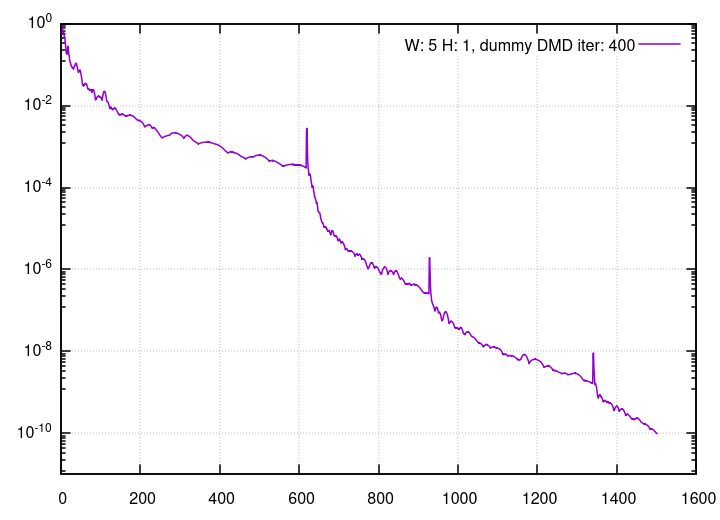

In [6]:
Image("NavierStokesW5H1_DDMD400.png", width=600)

### 1.1. Challenges of this method
One challenge is that we still <strong>need to guess what iteration to do a dummy DMD</strong>, and find the oscillation period. Because if we do this analysis too early, we would get an oscillation period which is transient and would change after some iterations. (we get the oscillation period of some transient mode rather than the slowest converging mode that we are interested)


## 2. Navier--Stokes Unstructured mesh - Newtonian2D physics in ANSLib

The Newtonian2D physics with a cavity mesh has a slow converging rate with longer iterations compared to other problems we tested before, such as Poisson and Burgers. Hence, when I first applied DMD over-relaxation on this problem, I was applying it too early, \[incorrectly\] assuming we ar at a  constant and steady part of the residual history.\
By looking at the residual history of Newtonian2D for 10000 iterations, I noticed that the residual become steady at around iteration 2000 (not 500 as I assumed before). And by applying a DMD over-relaxation update at that iteration I was able to achieve 3 orders of magnitude better convergence compared to the case with no-DMD-update.
- <strong>It's worth mentioning that the simulation for 10000 iterations takes about 20 minutes to run in parallel. </strong>

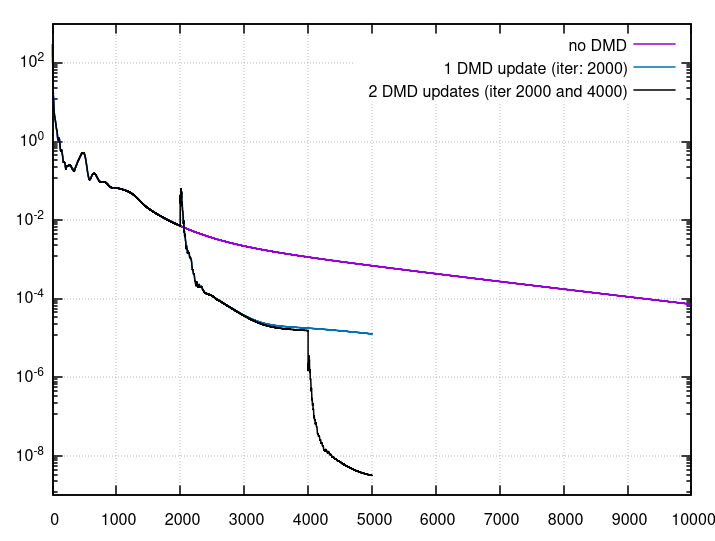

In [5]:
Image("Newtonian2D_ResPlot.png", width=600)